# About This Kernel
This verbosity tries to explain everything I could know. Once you get through the notebook, you can find this useful and straightforward. I attempted to explain things as simple as possible. We are going to learn about the data and get ideas for feature engineering and modeling.

# Competition Info
The dataset for this competition includes aggregate stopped vehicle information and intersection wait times. Your task is to predict congestion, based on an aggregate measure of stopping distance and waiting times, at intersections in 4 major US cities: Atlanta, Boston, Chicago & Philadelphia.

![](http://media1.giphy.com/media/SI7JdaPix700qX6qCm/source.gif)

# Objective
* Exploratory Data Analysis (EDA) to analyzing data sets to summarize their main characteristics, often with visual methods.
* Extensive feature engineering and modeling.

# 1. Importing Packages and Collecting Data


In [1]:
'''Ignore deprecation and future, and user warnings.'''
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

'''Import basic modules.'''
import pandas as pd
import numpy as np
from scipy import stats

'''Customize visualization
Seaborn and matplotlib visualization.'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

'''Plotly visualization .'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [2]:
'''Read in export and import data from CSV file'''
df_train = pd.read_csv('../input/bigquery-geotab-intersection-congestion/train.csv')
df_test = pd.read_csv('../input/bigquery-geotab-intersection-congestion/test.csv')

# 2. Variable Description, Identification, and Correction

In [3]:
'''Train and Test data at a glance.'''
bold('**Preview of Train Data:**')
display(df_train.head())
bold('**Preview of Test Data:**')
display(df_test.head())

**Preview of Train Data:**

RowId  IntersectionId  Latitude  Longitude               EntryStreetName  \
0  1920335               0  33.79166  -84.43003  Marietta Boulevard Northwest   
1  1920336               0  33.79166  -84.43003  Marietta Boulevard Northwest   
2  1920337               0  33.79166  -84.43003  Marietta Boulevard Northwest   
3  1920338               0  33.79166  -84.43003  Marietta Boulevard Northwest   
4  1920339               0  33.79166  -84.43003  Marietta Boulevard Northwest   

                 ExitStreetName EntryHeading ExitHeading  Hour  Weekend  ...  \
0  Marietta Boulevard Northwest           NW          NW     0        0  ...   
1  Marietta Boulevard Northwest           SE          SE     0        0  ...   
2  Marietta Boulevard Northwest           NW          NW     1        0  ...   
3  Marietta Boulevard Northwest           SE          SE     1        0  ...   
4  Marietta Boulevard Northwest           NW          NW     2        0  ...   

   TimeFromFirstStop_p40 TimeFromFirstStop_p50  TimeFromFirstStop_p60  \
0                      0                     0                      0   
1                      0                     0                      0   
2                      0                     0                      0   
3                      0                     0                      0   
4                      0                     0                      0   

   TimeFromFirstStop_p80  DistanceToFirstStop_p20  DistanceToFirstStop_p40  \
0                      0                      0.0                      0.0   
1                      0                      0.0                      0.0   
2                      0                      0.0                      0.0   
3                      0                      0.0                      0.0   
4                      0                      0.0                      0.0   

   DistanceToFirstStop_p50  DistanceToFirstStop_p60  DistanceToFirstStop_p80  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

      City  
0  Atlanta  
1  Atlanta  
2  Atlanta  
3  Atlanta  
4  Atlanta  

[5 rows x 28 columns]

**Preview of Test Data:**

RowId  IntersectionId  Latitude  Longitude             EntryStreetName  \
0      0               1  33.75094  -84.39303  Peachtree Street Southwest   
1      1               1  33.75094  -84.39303  Peachtree Street Southwest   
2      2               1  33.75094  -84.39303  Peachtree Street Southwest   
3      3               1  33.75094  -84.39303  Peachtree Street Southwest   
4      4               1  33.75094  -84.39303  Peachtree Street Southwest   

               ExitStreetName EntryHeading ExitHeading  Hour  Weekend  Month  \
0   Mitchell Street Southwest           SW          SE     0        0      6   
1  Peachtree Street Southwest           SW          SW     0        0      6   
2  Peachtree Street Southwest           NE          NE     1        0      6   
3  Peachtree Street Southwest           SW          SW     1        0      6   
4  Peachtree Street Southwest           NE          NE     2        0      6   

                                                Path     City  
0  Peachtree Street Southwest_SW_Mitchell Street ...  Atlanta  
1  Peachtree Street Southwest_SW_Peachtree Street...  Atlanta  
2  Peachtree Street Southwest_NE_Peachtree Street...  Atlanta  
3  Peachtree Street Southwest_SW_Peachtree Street...  Atlanta  
4  Peachtree Street Southwest_NE_Peachtree Street...  Atlanta

In [4]:
'''Dimension of train and test data'''
bold('**Shape of our train and test data**')
print('Dimension of train:',df_train.shape) 
print('Dimension of test:',df_test.shape)

**Shape of our train and test data**

Dimension of train: (857409, 28)
Dimension of test: (1920335, 13)


In [5]:
'''Funtion for Variable Description'''
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values
    return summary

In [6]:
bold('**Variable Description of  train Data:**')
display(description(df_train))
bold('**Variable Description of  test Data:**')
display(description(df_test))

**Variable Description of  train Data:**

Name   dtypes  Missing  Uniques  \
0                     RowId    int64        0   857409   
1            IntersectionId    int64        0     2539   
2                  Latitude  float64        0     4505   
3                 Longitude  float64        0     4541   
4           EntryStreetName   object     8189     1707   
5            ExitStreetName   object     5534     1693   
6              EntryHeading   object        0        8   
7               ExitHeading   object        0        8   
8                      Hour    int64        0       24   
9                   Weekend    int64        0        2   
10                    Month    int64        0        9   
11                     Path   object        0    15111   
12     TotalTimeStopped_p20    int64        0      172   
13     TotalTimeStopped_p40    int64        0      234   
14     TotalTimeStopped_p50    int64        0      264   
15     TotalTimeStopped_p60    int64        0      311   
16     TotalTimeStopped_p80    int64        0      403   
17    TimeFromFirstStop_p20    int64        0      239   
18    TimeFromFirstStop_p40    int64        0      306   
19    TimeFromFirstStop_p50    int64        0      329   
20    TimeFromFirstStop_p60    int64        0      351   
21    TimeFromFirstStop_p80    int64        0      355   
22  DistanceToFirstStop_p20  float64        0     3479   
23  DistanceToFirstStop_p40  float64        0     6257   
24  DistanceToFirstStop_p50  float64        0     7483   
25  DistanceToFirstStop_p60  float64        0     9495   
26  DistanceToFirstStop_p80  float64        0    13267   
27                     City   object        0        4   

                                          First Value  \
0                                             1920335   
1                                                   0   
2                                             33.7917   
3                                              -84.43   
4                        Marietta Boulevard Northwest   
5                        Marietta Boulevard Northwest   
6                                                  NW   
7                                                  NW   
8                                                   0   
9                                                   0   
10                                                  6   
11  Marietta Boulevard Northwest_NW_Marietta Boule...   
12                                                  0   
13                                                  0   
14                                                  0   
15                                                  0   
16                                                  0   
17                                                  0   
18                                                  0   
19                                                  0   
20                                                  0   
21                                                  0   
22                                                  0   
23                                                  0   
24                                                  0   
25                                                  0   
26                                                  0   
27                                            Atlanta   

                                         Second Value  \
0                                             1920336   
1                                                   0   
2                                             33.7917   
3                                              -84.43   
4                        Marietta Boulevard Northwest   
5                        Marietta Boulevard Northwest   
6                                                  SE   
7                                                  SE   
8                                                   0   
9                                                   0   
10                                                  6   
11

**Variable Description of  test Data:**

Name   dtypes  Missing  Uniques  \
0             RowId    int64        0  1920335   
1    IntersectionId    int64        0     2768   
2          Latitude  float64        0     5613   
3         Longitude  float64        0     5614   
4   EntryStreetName   object    19157     2136   
5    ExitStreetName   object    16340     2117   
6      EntryHeading   object        0        8   
7       ExitHeading   object        0        8   
8              Hour    int64        0       24   
9           Weekend    int64        0        2   
10            Month    int64        0        9   
11             Path   object        0    19855   
12             City   object        0        4   

                                          First Value  \
0                                                   0   
1                                                   1   
2                                             33.7509   
3                                             -84.393   
4                          Peachtree Street Southwest   
5                           Mitchell Street Southwest   
6                                                  SW   
7                                                  SE   
8                                                   0   
9                                                   0   
10                                                  6   
11  Peachtree Street Southwest_SW_Mitchell Street ...   
12                                            Atlanta   

                                         Second Value  \
0                                                   1   
1                                                   1   
2                                             33.7509   
3                                             -84.393   
4                          Peachtree Street Southwest   
5                          Peachtree Street Southwest   
6                                                  SW   
7                                                  SW   
8                                                   0   
9                                                   0   
10                                                  6   
11  Peachtree Street Southwest_SW_Peachtree Street...   
12                                            Atlanta   

                                          Third Value  
0                                                   2  
1                                                   1  
2                                             33.7509  
3                                             -84.393  
4                          Peachtree Street Southwest  
5                          Peachtree Street Southwest  
6                                                  NE  
7                                                  NE  
8                                                   1  
9                                                   0  
10                                                  6  
11  Peachtree Street Southwest_NE_Peachtree Street...  
12                                            Atlanta

## Explation of Features:
Explation given by: @pcjimmmy, @sohier, @anshuls235, @awray3 , @panosc 

**Intersection :** An intersection is an at-grade junction where two or more roads or streets meet or cross. Intersections may be classified by number of road segments, traffic controls, and/or lane design.

**EntryStreetName :** It is the street name where the traffic or vehicle entering the intersection. 

**ExitStreentName :** It is the street name where the traffic or vehicel exiting the intersection.
* We have the missing values in the Entry and Exit StreetName only.

**EntryHeading and ExitHeading :** Those are the directions the vehicle was traveling when entering/exiting the intersection. For example, you could see North/North if a truck just drove straight through without turning.

**TotalTimeStopped_p20,_p40,_p50,_p60,_p80 :**  Let's focus on one row, say the one with RowId 2255742, 2255748. This row has the following percentiles for the Total Time Stopped feature:

p20: 0

p40: 0

p50: 0

p60: 0

p80: 13

Of all the cars driving through the intersection, the first 60% didn't have to wait at all. The next 20% had to wait for 13 seconds and not sure about the next 20% as the data is not given for that.

**DistanceToFirstStop:** DistanceToFirstStop is how far before the intersection the truck stopped for the first time.

**TimeFromFirstStop:** TimeFromFirstStop is how long it took from that point to cross the intersection.

# 3. Exploratory Data Analysis

## 3.1 Intersection ID

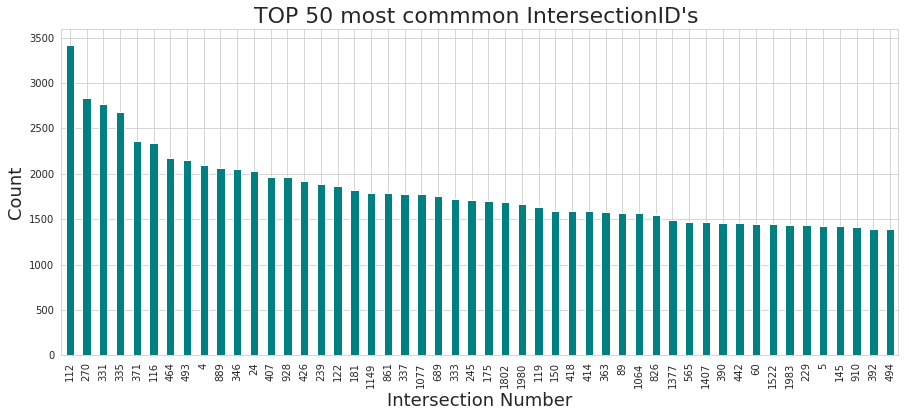

In [7]:
'''Visulization of IntersectionID'''
plt.figure(figsize=(15,6))
df_train.IntersectionId.value_counts()[:50].plot(kind='bar', color = 'teal')
plt.xlabel("Intersection Number", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("TOP 50 most commmon IntersectionID's ", fontsize=22)
plt.show()

## 3.2 Entry/Exit Street Names

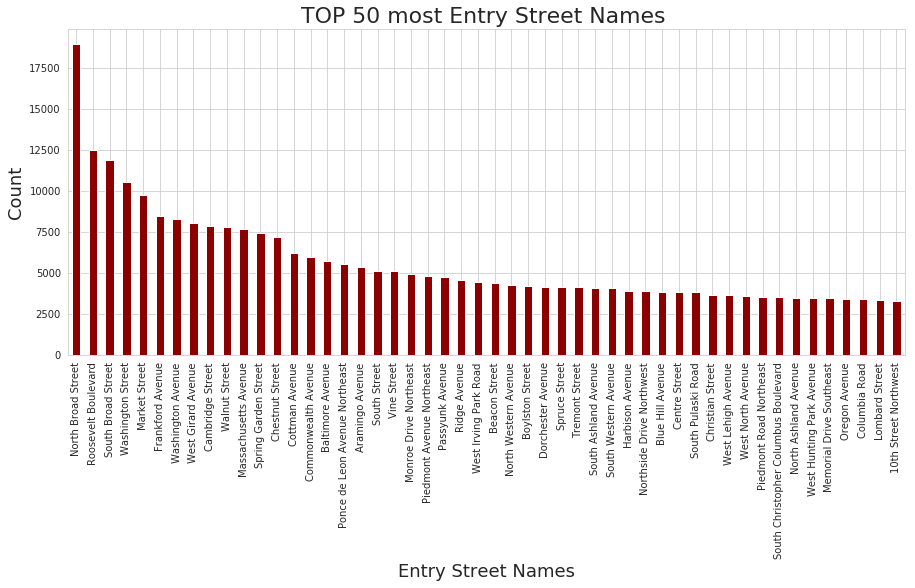

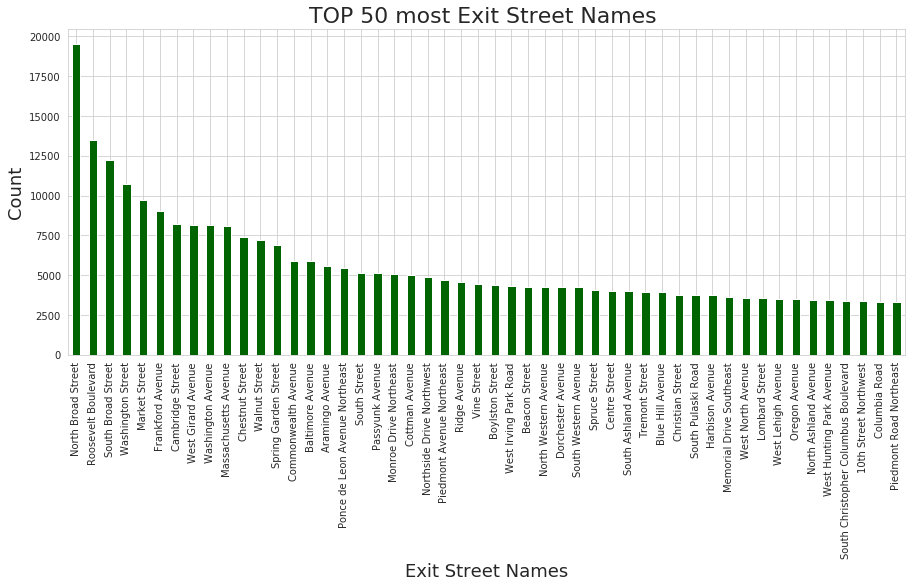

In [8]:
'''Visulization of Entry/Exit StreetNames'''
plt.figure(figsize=(15,6))
df_train['EntryStreetName'].value_counts()[:50].plot(kind='bar', color = 'darkred')
plt.xlabel("Entry Street Names", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("TOP 50 most Entry Street Names ", fontsize=22)
plt.show()

plt.figure(figsize=(15,6))
df_train['ExitStreetName'].value_counts()[:50].plot(kind='bar', color = 'darkgreen')
plt.xlabel("Exit Street Names", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("TOP 50 most Exit Street Names ", fontsize=22)
plt.show()

* North Broad Street is the most Entry and Exit Street Names.

## 3.3 Path

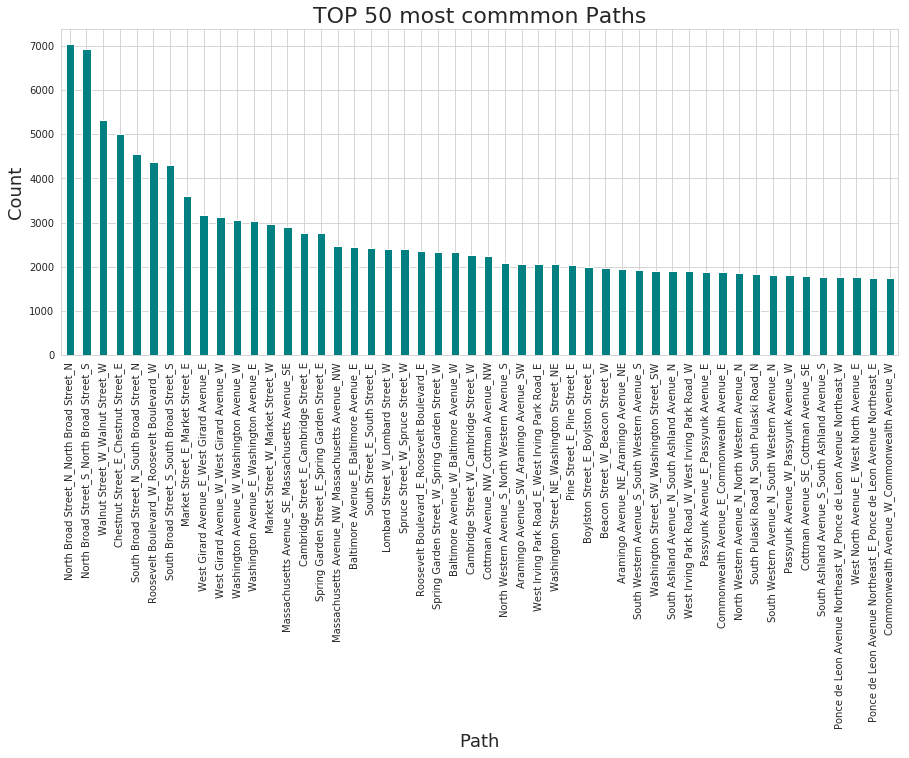

In [9]:
'''Visulization of Path'''
plt.figure(figsize=(15,6))
df_train.Path.value_counts()[:50].plot(kind='bar', color = 'teal')
plt.xlabel("Path", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.title("TOP 50 most commmon Paths", fontsize=22)
plt.show()

* The most common path is North Broad Street_N_North Broad Street_N 
![](https://www.google.com/maps/vt/data=MWTnQbznJmgQc1dK9zCSLTWU57GXsKLQZdCtJkcTtx32-iDaKYZkXEOKPnBlEbEwZQBQFWHr9f4dvV5rZwSBFGBTbKTtm8_0deCBMUj2viNEif81m4boySADz5YLfdkwgqpz_U9TSBsZbNa9lyUowfNhDFoa65PDHXL13kK8mIK_4K6ZN7l5z5P-2PklT5-64QKwoOIuyYaAk2I1xcMbtmD7m3WqGgiPTQo0ZY9i0Qhk-y1qcksSqQ)

## 3.4 Entry/Exit Heading

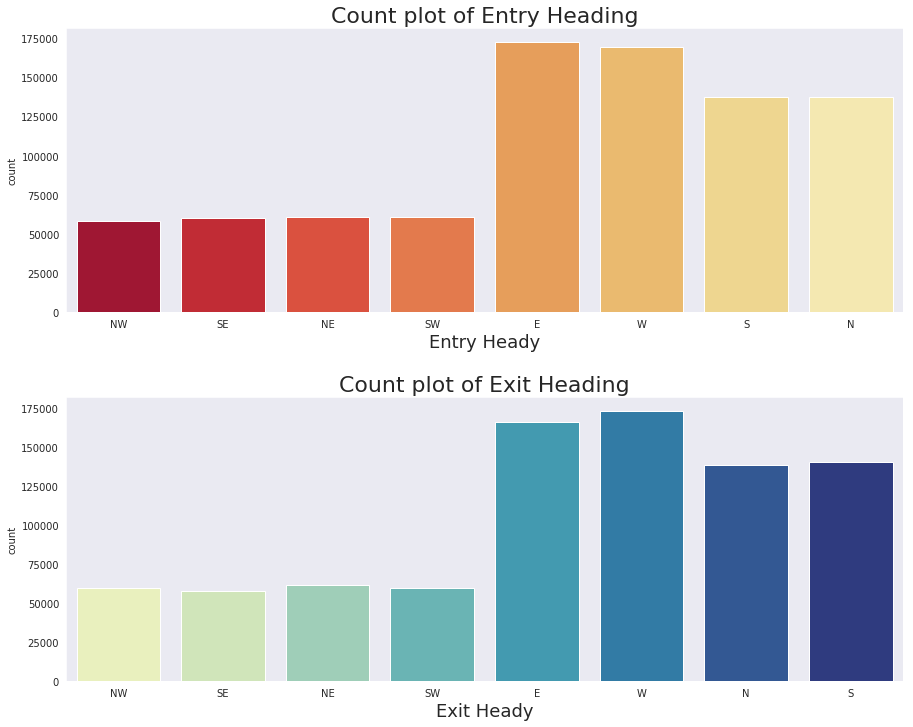

In [10]:
sns.set_style("dark")
fig, ax = plt.subplots(2,1, figsize=[15, 12])

sns.countplot(data = df_train, x = 'EntryHeading', ax = ax[0], palette = 'YlOrRd_r')
ax[0].set_title('Count plot of Entry Heading', fontsize = 22)
ax[0].set_xlabel('Entry Heady', fontsize = 18)

sns.countplot(data = df_train, x = 'ExitHeading', ax = ax[1], palette = 'YlGnBu')
ax[1].set_title('Count plot of Exit Heading', fontsize = 22)
ax[1].set_xlabel('Exit Heady', fontsize = 18)

plt.subplots_adjust(hspace = 0.3)
plt.show()

* We can observed that in general Entry and Exit Heading is exactly the same.
* Most of vehicel are heading toward East and West.

## 3.5 City and Time features

I will analyse city and time feature together to get clear picture about the data and its distribution.

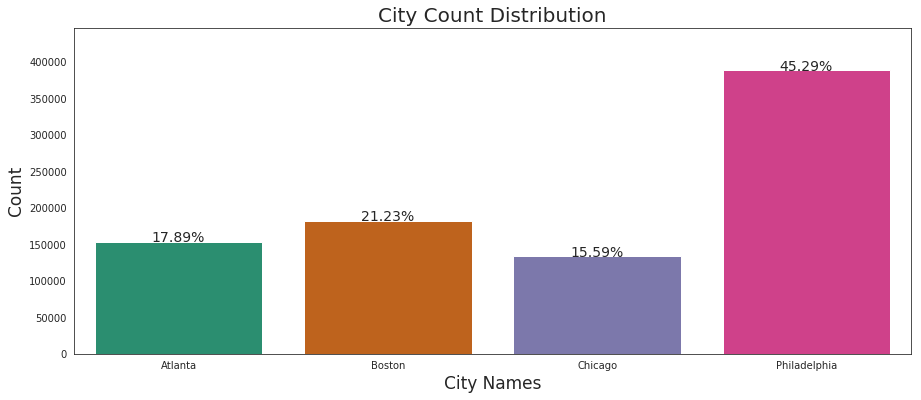

In [11]:
total = len(df_train)
plt.figure(figsize=(15,6))
sns.set_style("white")

ax = sns.countplot(x = "City", data = df_train, palette = 'Dark2')
ax.set_title("City Count Distribution", fontsize=20)
ax.set_ylabel("Count",fontsize= 17)
ax.set_xlabel("City Names", fontsize=17)
sizes=[]
for p in ax.patches:
    height = p.get_height()
    sizes.append(height)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
ax.set_ylim(0, max(sizes) * 1.15)

plt.show()

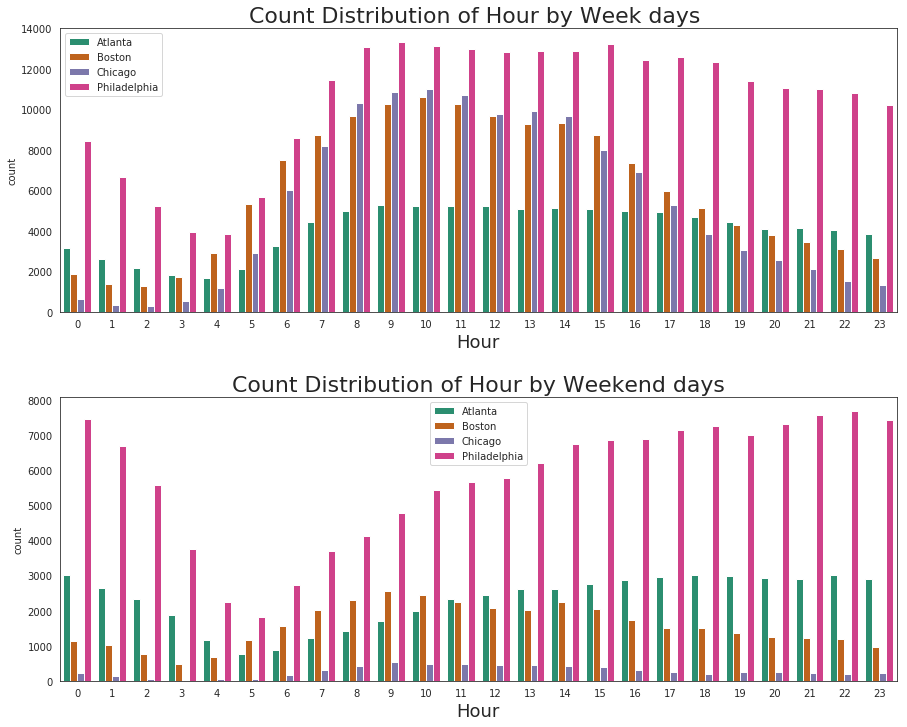

In [12]:
fig, ax = plt.subplots(2,1, figsize=[15, 12])

sns.countplot(data = df_train[df_train['Weekend']==0], x = 'Hour', hue = 'City', ax = ax[0], palette = 'Dark2')
ax[0].legend()
ax[0].set_title('Count Distribution of Hour by Week days ', fontsize = 22)
ax[0].set_xlabel('Hour', fontsize = 18)

sns.countplot(data = df_train[df_train['Weekend']==1], x = 'Hour', hue = 'City', ax = ax[1], palette = 'Dark2')
ax[1].legend()
ax[1].set_title('Count Distribution of Hour by Weekend days', fontsize = 22)
ax[1].set_xlabel('Hour', fontsize = 18)

plt.subplots_adjust(hspace = 0.3)
plt.show()

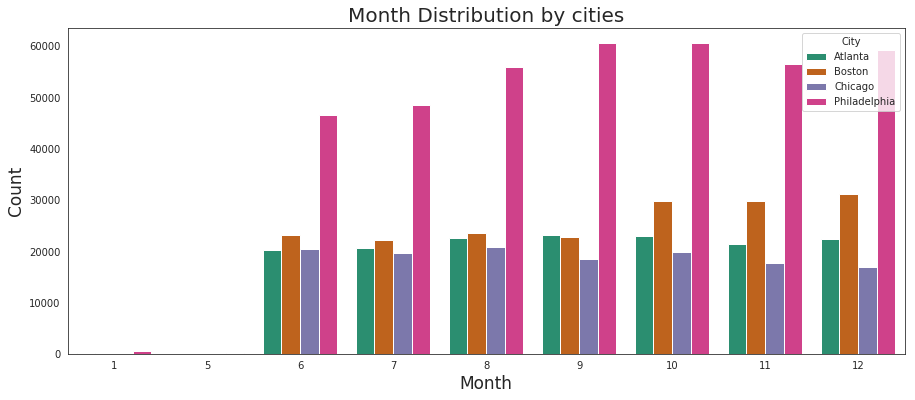

In [13]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x = "Month", data = df_train, hue = 'City',palette = 'Dark2')
ax.set_title("Month Distribution by cities", fontsize=20)
ax.set_ylabel("Count",fontsize= 17)
ax.set_xlabel("Month", fontsize=17)
plt.show()

**Findings:**
*In the city count distribution:*  
   * Philadelphia have 45.29% of the total entries followed by Boston(21.23%), Atlanta(17.89%), Chicago(15.59%).

*In the  Distribution of Hour by Week days:*
   * Between 08:00 to 17:00, is the rush hour in all cities, but for Philadelphia, it is 08:00 to 24:00.
   
*In the  Distribution of Hour by Weeked days:*
   * All the cities are by far the most common in all hours during the weekend, only on 05:00 to 7:00. 

*In the Distribution of month by cities:*
   * It's seem that we have only six month of data only.

## 3.6 Latitude/Longitude

In [14]:
'''Visualition of Map Plot of Atlanta city'''
import mplleaflet
plt.figure(figsize=(10,10))
map1 = df_train[df_train['City']=='Atlanta'].groupby(['Latitude', 'Longitude'])['RowId'].count().reset_index()
plt.scatter(map1['Longitude'], map1['Latitude'], alpha=0.5)

mplleaflet.display()

In [15]:
'''Visualition of Map Plot of Boston city'''
plt.figure(figsize=(10,10))
map2 = df_train[df_train['City']=='Boston'].groupby(['Latitude', 'Longitude'])['RowId'].count().reset_index()
plt.scatter(map2['Longitude'], map2['Latitude'], alpha=0.5)

mplleaflet.display()

In [16]:
'''Visualition of Map Plot of Philadelphia city'''
plt.figure(figsize=(10,10))
map3 = df_train[df_train['City']=='Philadelphia'].groupby(['Latitude', 'Longitude'])['RowId'].count().reset_index()
plt.scatter(map3['Longitude'], map3['Latitude'], alpha=0.5)

mplleaflet.display()

In [17]:
'''Visualition of Map Plot of Chicago city'''
plt.figure(figsize=[10, 10])
map4 = df_train[df_train['City']=='Chicago'].groupby(['Latitude', 'Longitude'])['RowId'].count().reset_index()
sns.kdeplot(map4['Longitude'], map4['Latitude'])

mplleaflet.display()

**Findings:**

I got the idea from @jpmille

Intersection as a collection of related traffic paths through a common point. In this dataset, the 'Path' feature lists  the unique paths at each interection. 

In the below picture : 
* Here the intersection of West Dauphin Street, Germantown Avenue, North 7th Street. (see in Total Time Stopped section)
* It's a 6 leg intersection: it can have up to 6 paths plus any u-turns.

<img src= 'https://i.ibb.co/rH898sn/Screenshot-94-LI.jpg' width="500px">

* Day/Night and weather affect traffics. We can Add temperature and rainfall of the cities.
* Urban locations: likely if a street is numbered but Rural locations are not, may affect the traffic.
* The intersection is surrounded by businesses: may affect the traffic during weeks and weekend day.

## 3.7 Total Time Stopped
In this section, we are going analysis the total time stopped on the intersections in different cities.

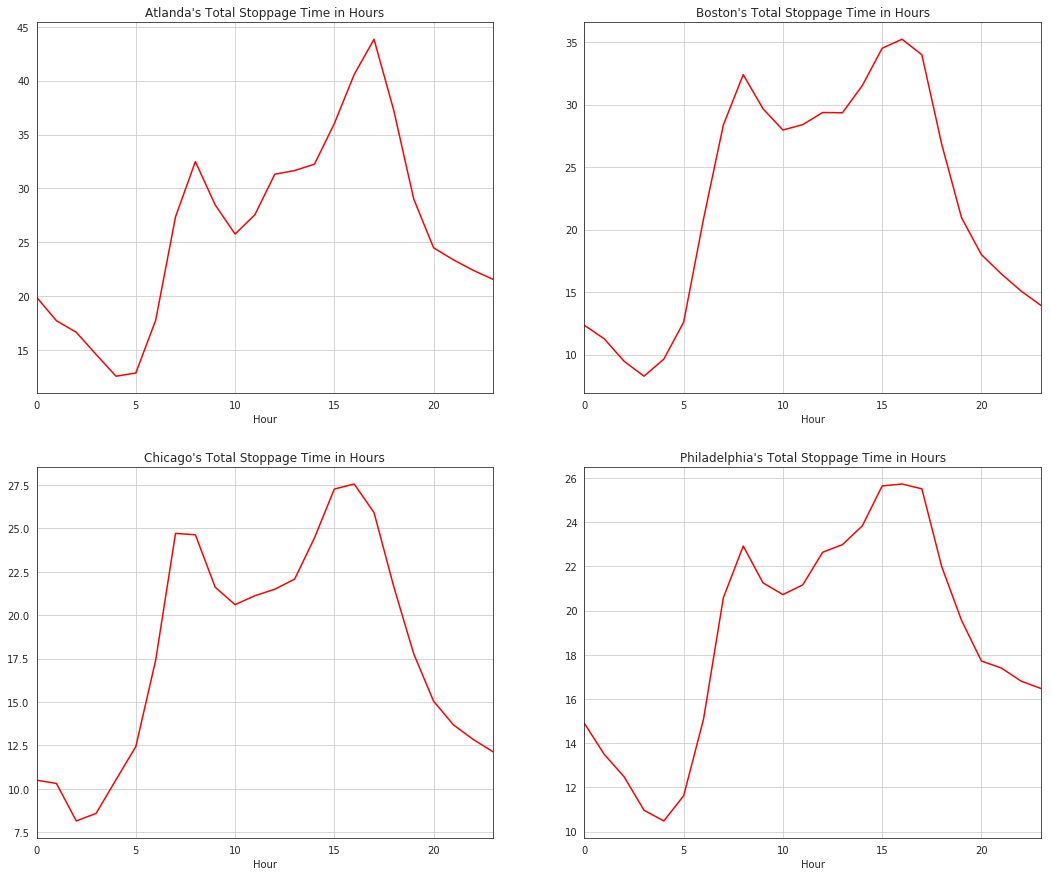

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=2)
sns.set_style("whitegrid")

df_train[df_train['City']=='Atlanta'].groupby('Hour')['TotalTimeStopped_p80'].mean().plot(
    ax=ax[0,0],title="Atlanda's Total Stoppage Time in Hours", color='r', figsize=(18,15))

df_train[df_train['City']=='Boston'].groupby('Hour')['TotalTimeStopped_p80'].mean().plot(
    ax=ax[0,1],title="Boston's Total Stoppage Time in Hours", color='r', figsize=(18,15))


df_train[df_train['City']=='Chicago'].groupby('Hour')['TotalTimeStopped_p80'].mean().plot(
    ax=ax[1,0],title="Chicago's Total Stoppage Time in Hours", color='r', figsize=(18,15))


df_train[df_train['City']=='Philadelphia'].groupby('Hour')['TotalTimeStopped_p80'].mean().plot(
    ax=ax[1,1],title="Philadelphia's Total Stoppage Time in Hours", color='r', figsize=(18,15))

plt.show()

**Finding:**
* we can notice that during the eveving from 15:00 to 17:00 stoppage time has significantly increased. 

# 4. Feature Engineering


## <span style='color:darkgreen;background:yellow'>4.1. Intersection ID 

Making a new columns of IntersectionId with city name.

In [19]:
df_train['Intersection'] = df_train['IntersectionId'].astype(str) + df_train['City']
df_test['Intersection'] = df_test['IntersectionId'].astype(str) + df_test['City']
print(df_train['Intersection'].sample(6).values)

['346Atlanta' '412Philadelphia' '229Atlanta' '533Philadelphia'
 '295Atlanta' '2212Chicago']


In [20]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
le.fit(pd.concat([df_train['Intersection'], df_test['Intersection']]).drop_duplicates().values)
df_train['Intersection'] = le.transform(df_train['Intersection'])
df_test['Intersection'] = le.transform(df_test['Intersection'])
print(df_train['Intersection'].sample(6).values)

[1238 4737 5073 4326 1905 1834]


## <span style='color:darkgreen;background:yellow'>4.2. Encoding Street Names 
We are encode the street name according to its road type. 

In [21]:
# Reference: https://www.kaggle.com/bgmello/how-one-percentile-affect-the-others

'''Let's use the following road types: Street, Avenue, Road, Boulevard, Broad and Drive'''
road_encoding = {
    'Road': 1,
    'Street': 2,
    'Avenue': 2,
    'Drive': 3,
    'Broad': 3,
    'Boulevard': 4
}

In [22]:
def encode(x):
    if pd.isna(x):
        return 0
    for road in road_encoding.keys():
        if road in x:
            return road_encoding[road]
        
    return 0

In [23]:
df_train['EntryTypeStreet'] = df_train['EntryStreetName'].apply(encode)
df_train['ExitTypeStreet'] = df_train['ExitStreetName'].apply(encode)
df_test['EntryTypeStreet'] = df_test['EntryStreetName'].apply(encode)
df_test['ExitTypeStreent'] = df_test['ExitStreetName'].apply(encode)
print(df_train['EntryTypeStreet'].sample(10).values)

[2 1 2 2 2 3 2 2 0 2]


In [24]:
df_train["same_street_exact"] = (df_train["EntryStreetName"] ==  df_train["ExitStreetName"]).astype(int)
df_test["same_street_exact"] = (df_test["EntryStreetName"] ==  df_test["ExitStreetName"]).astype(int)

## <span style='color:darkgreen;background:yellow'>4.3. Encoding Cordinal Direction 
Turn Direction: 

The cardinal directions can be expressed using the equation: $$ \frac{\theta}{\pi} $$

Where $\theta$ is the angle between the direction we want to encode and the north compass direction, measured clockwise.


Reference: 
* https://www.kaggle.com/danofer/baseline-feature-engineering-geotab-69-5-lb
* This is an important feature, as shown by janlauge here : https://www.kaggle.com/janlauge/intersection-congestion-eda

* We can fill in this code in python (e.g. based on: https://www.analytics-link.com/single-post/2018/08/21/Calculating-the-compass-direction-between-two-points-in-Python , https://rosettacode.org/wiki/Angle_difference_between_two_bearings#Python , https://gist.github.com/RobertSudwarts/acf8df23a16afdb5837f )

In [25]:
'''Defineing the directions'''
directions = {
    'N': 0,
    'NE': 1/4,
    'E': 1/2,
    'SE': 3/4,
    'S': 1,
    'SW': 5/4,
    'W': 3/2,
    'NW': 7/4
}

In [26]:
df_train['EntryHeading'] = df_train['EntryHeading'].map(directions)
df_train['ExitHeading'] = df_train['ExitHeading'].map(directions)

df_test['EntryHeading'] = df_test['EntryHeading'].map(directions)
df_test['ExitHeading'] = df_test['ExitHeading'].map(directions)

df_train['diffHeading'] = df_train['EntryHeading']- df_train['ExitHeading']  
df_test['diffHeading'] = df_test['EntryHeading']- df_test['ExitHeading']

display(df_train[['ExitHeading','EntryHeading','diffHeading']].drop_duplicates().head(5))

ExitHeading  EntryHeading  diffHeading
0           1.75          1.75          0.0
1           0.75          0.75          0.0
381         0.75          0.25         -0.5
654         0.25          0.25          0.0
656         0.75          1.25          0.5

## <span style='color:darkgreen;background:yellow'>4.4. Encoding Cyclic or Time Features
Encoding cyclical continuous features - 24-hour time. Some data is inherently cyclical. Time is a rich example of this: minutes, hours, seconds, day of week, week of month, month, season, and so on all follow cycles.

Reference:
* https://www.kaggle.com/vikassingh1996/handling-categorical-variables-encoding-modeling
* https://www.kaggle.com/avanwyk/encoding-cyclical-features-for-deep-learning

In [27]:
#def cyclical_encode(data, col, max_val):
#    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
#    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
#    return data

#df_train = cyclical_encode(df_train, 'Hour', 24)
#df_test = cyclical_encode(df_test, 'Hour', 24) 

In [28]:
#'''One Hot Ecoding of month feature'''
#df_train = pd.concat([df_train, pd.get_dummies(df_train['Month'], prefix='Month', drop_first = False)], axis=1)
#df_test = pd.concat([df_test, pd.get_dummies(df_test['Month'], prefix='Month', drop_first = False)], axis=1)

## <span style='color:darkgreen;background:yellow'>4.5. Encoding City + Temperature (°F) + Rainfall (inches) 

I am adding temperature and rainfall because these variables may affect the taffic stoppage time in cities. This kernel will help you to understand how other variables are affecting the traffic. https://www.kaggle.com/jpmiller/eda-to-break-through-rmse-68

Data is collected from https://www.ncdc.noaa.gov/ and http://www.rssweather.com OR just google it.

In [29]:
'''One Hot Ecoding of City feature'''
df_train = pd.concat([df_train, pd.get_dummies(df_train['City'], drop_first = False)], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['City'], drop_first = False)], axis=1)

In [30]:
"""Adding temperature (°F) of each city by month"""
# Reference: https://www.kaggle.com/dcaichara/feature-engineering-and-lightgbm
monthly_avg = {'Atlanta1': 43.0, 'Atlanta5': 68.5, 'Atlanta6': 76.0, 'Atlanta7': 78.0, 'Atlanta8': 78.0, 'Atlanta9': 72.5,
              'Atlanta10': 62.0, 'Atlanta11': 52.5, 'Atlanta12': 45.0, 'Boston1': 29.5, 'Boston5': 58.5, 'Boston6': 68.0,
              'Boston7': 74.0, 'Boston8': 73.0, 'Boston9': 65.5, 'Boston10': 54.5,'Boston11': 45.0, 'Boston12': 35.0,
              'Chicago1': 27.0, 'Chicago5': 59.5, 'Chicago6': 70.0, 'Chicago7': 76.0, 'Chicago8': 75.5, 'Chicago9': 68.0,
              'Chicago10': 56.0,  'Chicago11': 44.5, 'Chicago12': 32.0, 'Philadelphia1': 34.5, 'Philadelphia5': 66.0,
              'Philadelphia6': 75.5, 'Philadelphia7': 80.5, 'Philadelphia8': 78.5, 'Philadelphia9': 71.5, 'Philadelphia10': 59.5,
              'Philadelphia11': 49.0, 'Philadelphia12': 40.0}
# Concatenating the city and month into one variable
df_train['city_month'] = df_train["City"] + df_train["Month"].astype(str)
df_test['city_month'] = df_test["City"] + df_test["Month"].astype(str)

# Creating a new column by mapping the city_month variable to it's corresponding average monthly temperature
df_train["average_temp"] = df_train['city_month'].map(monthly_avg)
df_test["average_temp"] = df_test['city_month'].map(monthly_avg)

In [31]:
"""Adding rainfall (inches) of each city by month"""
monthly_rainfall = {'Atlanta1': 5.02, 'Atlanta5': 3.95, 'Atlanta6': 3.63, 'Atlanta7': 5.12, 'Atlanta8': 3.67, 'Atlanta9': 4.09,
              'Atlanta10': 3.11, 'Atlanta11': 4.10, 'Atlanta12': 3.82, 'Boston1': 3.92, 'Boston5': 3.24, 'Boston6': 3.22,
              'Boston7': 3.06, 'Boston8': 3.37, 'Boston9': 3.47, 'Boston10': 3.79,'Boston11': 3.98, 'Boston12': 3.73,
              'Chicago1': 1.75, 'Chicago5': 3.38, 'Chicago6': 3.63, 'Chicago7': 3.51, 'Chicago8': 4.62, 'Chicago9': 3.27,
              'Chicago10': 2.71,  'Chicago11': 3.01, 'Chicago12': 2.43, 'Philadelphia1': 3.52, 'Philadelphia5': 3.88,
              'Philadelphia6': 3.29, 'Philadelphia7': 4.39, 'Philadelphia8': 3.82, 'Philadelphia9':3.88 , 'Philadelphia10': 2.75,
              'Philadelphia11': 3.16, 'Philadelphia12': 3.31}
# Creating a new column by mapping the city_month variable to it's corresponding average monthly rainfall
df_train["average_rainfall"] = df_train['city_month'].map(monthly_rainfall)
df_test["average_rainfall"] = df_test['city_month'].map(monthly_rainfall)

## <span style='color:darkgreen;background:yellow'>4.5 standardizing of lat-long

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
lat_long = ['Latitude', 'Longitude']
for col in lat_long:
    df_train[col] = (scaler.fit_transform(df_train[col].values.reshape(-1, 1)))
    df_test[col] = (scaler.fit_transform(df_test[col].values.reshape(-1, 1)))

## <span style='color:darkgreen;background:yellow'>4.6 Droping the variables 

In [33]:
"""Let's see the columns of data"""
df_train.columns.values

array(['RowId', 'IntersectionId', 'Latitude', 'Longitude',
       'EntryStreetName', 'ExitStreetName', 'EntryHeading', 'ExitHeading',
       'Hour', 'Weekend', 'Month', 'Path', 'TotalTimeStopped_p20',
       'TotalTimeStopped_p40', 'TotalTimeStopped_p50',
       'TotalTimeStopped_p60', 'TotalTimeStopped_p80',
       'TimeFromFirstStop_p20', 'TimeFromFirstStop_p40',
       'TimeFromFirstStop_p50', 'TimeFromFirstStop_p60',
       'TimeFromFirstStop_p80', 'DistanceToFirstStop_p20',
       'DistanceToFirstStop_p40', 'DistanceToFirstStop_p50',
       'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80', 'City',
       'Intersection', 'EntryTypeStreet', 'ExitTypeStreet',
       'same_street_exact', 'diffHeading', 'Atlanta', 'Boston', 'Chicago',
       'Philadelphia', 'city_month', 'average_temp', 'average_rainfall'],
      dtype=object)

In [34]:
"""Let's drop the unwanted variables from test and train dataset"""
df_train.drop(['RowId', 'IntersectionId', 'EntryStreetName', 'ExitStreetName', 'Path', 'city_month', 'City'], axis=1, inplace=True)
df_test.drop(['RowId', 'IntersectionId', 'EntryStreetName', 'ExitStreetName', 'Path', 'city_month', 'City'], axis=1, inplace=True)

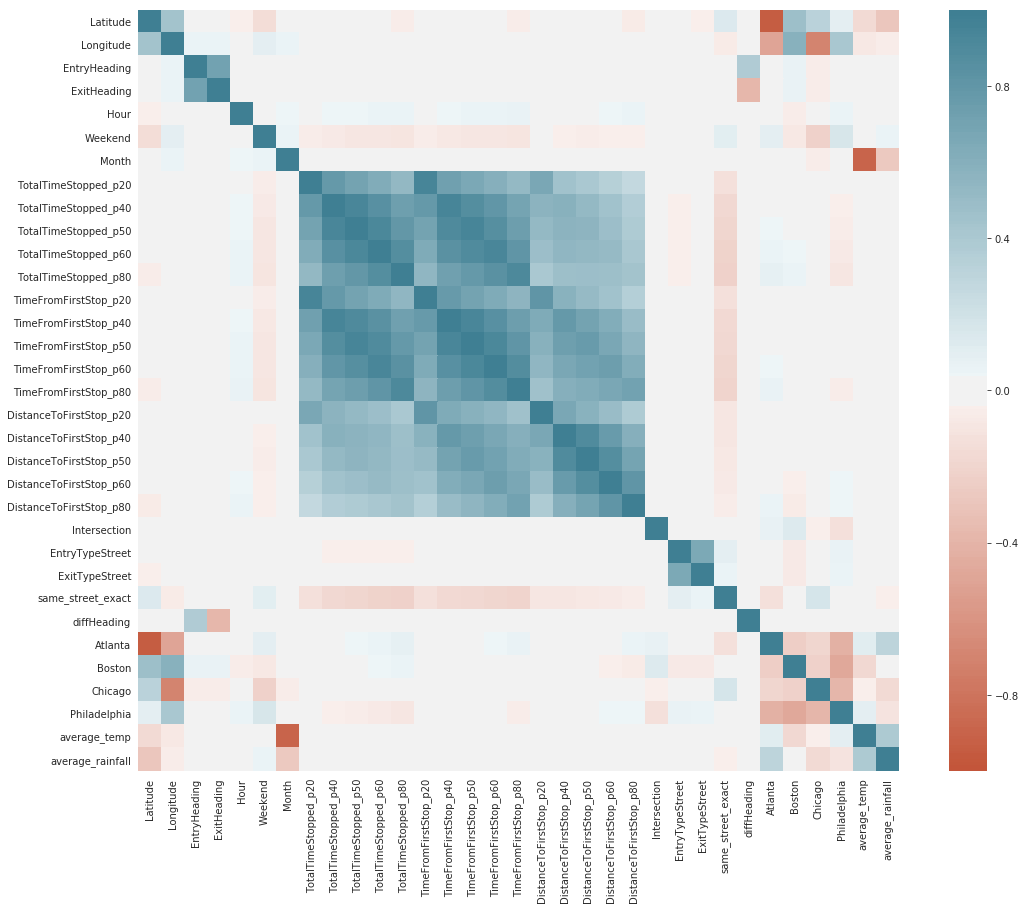

In [35]:
"""Let’s make a correlation matrix heatmap for the data set."""
plt.figure(figsize=(18,14))
sns.heatmap(df_train.corr(),vmin=-1, vmax=1, center=0,
            square=True, cmap = sns.diverging_palette(20, 220, n=200))
plt.show()

# 5. Seting X and Y

In [36]:
"""Let's look at our final train and test data for modelling."""
bold('**Updated train data for modelling:**')
display(df_train.head(3))
bold('**Updated test data for modelling:**')
display(df_test.head(3))

**Updated train data for modelling:**

Latitude  Longitude  EntryHeading  ExitHeading  Hour  Weekend  Month  \
0 -2.008347  -1.092678          1.75         1.75     0        0      6   
1 -2.008347  -1.092678          0.75         0.75     0        0      6   
2 -2.008347  -1.092678          1.75         1.75     1        0      6   

   TotalTimeStopped_p20  TotalTimeStopped_p40  TotalTimeStopped_p50  ...  \
0                     0                     0                     0  ...   
1                     0                     0                     0  ...   
2                     0                     0                     0  ...   

   EntryTypeStreet  ExitTypeStreet  same_street_exact  diffHeading  Atlanta  \
0                4               4                  1          0.0        1   
1                4               4                  1          0.0        1   
2                4               4                  1          0.0        1   

   Boston  Chicago  Philadelphia  average_temp  average_rainfall  
0       0        0             0          76.0              3.63  
1       0        0             0          76.0              3.63  
2       0        0             0          76.0              3.63  

[3 rows x 33 columns]

**Updated test data for modelling:**

Latitude  Longitude  EntryHeading  ExitHeading  Hour  Weekend  Month  \
0 -2.021772  -1.091847          1.25         0.75     0        0      6   
1 -2.021772  -1.091847          1.25         1.25     0        0      6   
2 -2.021772  -1.091847          0.25         0.25     1        0      6   

   Intersection  EntryTypeStreet  ExitTypeStreent  same_street_exact  \
0          2602                2                2                  0   
1          2602                2                2                  1   
2          2602                2                2                  1   

   diffHeading  Atlanta  Boston  Chicago  Philadelphia  average_temp  \
0          0.5        1       0        0             0          76.0   
1          0.0        1       0        0             0          76.0   
2          0.0        1       0        0             0          76.0   

   average_rainfall  
0              3.63  
1              3.63  
2              3.63

In [37]:
'''Function to reduce the DF size'''
# source: https://www.kaggle.com/kernels/scriptcontent/3684066/download

def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [38]:
df_train = reduce_mem_usage(df_train)
df_test = reduce_mem_usage(df_test)

Memory usage of dataframe is 192.97 MB
Memory usage after optimization is: 49.06 MB
Decreased by 74.6%
Memory usage of dataframe is 212.44 MB
Memory usage after optimization is: 54.94 MB
Decreased by 74.1%


In [39]:
'''Seting X and Y'''
target_var = df_train.iloc[:, 7:22]
X_train = df_train.drop(target_var,axis = 1)

y1_train = df_train["TotalTimeStopped_p20"]
y2_train = df_train["TotalTimeStopped_p50"]
y3_train = df_train["TotalTimeStopped_p80"]
y4_train = df_train["DistanceToFirstStop_p20"]
y5_train = df_train["DistanceToFirstStop_p50"]
y6_train = df_train["DistanceToFirstStop_p80"]

X_test = df_test

In [40]:
"""Let's have a final look at our data"""
bold('**Data Dimension for Model Building:**')
print('Input matrix dimension:', X_train.shape)
print('Output vector dimension:',y1_train.shape)
print('Test data dimension:', X_test.shape)

**Data Dimension for Model Building:**

Input matrix dimension: (857409, 18)
Output vector dimension: (857409,)
Test data dimension: (1920335, 18)


# 6. Model Building & Evaluation

In [41]:
description(X_train)

Name   dtypes  Missing  Uniques  First Value  Second Value  \
0            Latitude  float16        0      851    -2.007812     -2.007812   
1           Longitude  float16        0      270    -1.092773     -1.092773   
2        EntryHeading  float16        0        8     1.750000      0.750000   
3         ExitHeading  float16        0        8     1.750000      0.750000   
4                Hour     int8        0       24     0.000000      0.000000   
5             Weekend     int8        0        2     0.000000      0.000000   
6               Month     int8        0        9     6.000000      6.000000   
7        Intersection    int16        0     4796     0.000000      0.000000   
8     EntryTypeStreet     int8        0        5     4.000000      4.000000   
9      ExitTypeStreet     int8        0        5     4.000000      4.000000   
10  same_street_exact     int8        0        2     1.000000      1.000000   
11        diffHeading  float16        0       15     0.000000      0.000000   
12            Atlanta  float16        0        2     1.000000      1.000000   
13             Boston  float16        0        2     0.000000      0.000000   
14            Chicago  float16        0        2     0.000000      0.000000   
15       Philadelphia  float16        0        2     0.000000      0.000000   
16       average_temp  float16        0       29    76.000000     76.000000   
17   average_rainfall  float16        0       31     3.630859      3.630859   

    Third Value  
0     -2.007812  
1     -1.092773  
2      1.750000  
3      1.750000  
4      1.000000  
5      0.000000  
6      6.000000  
7      0.000000  
8      4.000000  
9      4.000000  
10     1.000000  
11     0.000000  
12     1.000000  
13     0.000000  
14     0.000000  
15     0.000000  
16    76.000000  
17     3.630859

In [42]:
"""pecifying categorical features"""
cat_feat = ['Hour', 'Weekend','Month', 'same_street_exact', 'Intersection',
       'Atlanta', 'Boston', 'Chicago', 'Philadelphia', 'EntryTypeStreet', 'ExitTypeStreet']

In [43]:
all_preds ={0:[],1:[],2:[],3:[],4:[],5:[]}
all_target = [y1_train, y2_train, y3_train, y4_train, y5_train, y6_train]

In [44]:
# Reference: 
# https://medium.com/analytics-vidhya/hyperparameters-optimization-for-lightgbm-catboost-and-xgboost-regressors-using-bayesian-6e7c495947a9
# https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html#for-faster-speed

'''Importing Libraries'''
import lightgbm as lgb
from bayes_opt import BayesianOptimization

dtrain = lgb.Dataset(data=X_train, label=y1_train)

'''Define objective function'''
def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight, lambda_l1, lambda_l2):
      
        params = {'application':'regression','num_iterations': 400,
                  'learning_rate':0.01,
                  'metric':'rmse'} # Default parameters
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight
        params['lambda_l1'] = lambda_l1
        params['lambda_l2'] = lambda_l2
        
        cv_results = lgb.cv(params, dtrain, nfold=5, seed=44, categorical_feature=cat_feat, stratified=False,
                            verbose_eval =None)
#         print(cv_results)
        return -np.min(cv_results['rmse-mean'])

In [45]:
''' Define search space of hyperparameters'''
pds = {'num_leaves': (100, 230),
          'feature_fraction': (0.1, 0.5),
          'bagging_fraction': (0.8, 1),
          'lambda_l1': (0,3),
          'lambda_l2': (0,5),
          'max_depth': (8, 19),
          'min_split_gain': (0.001, 0.1),
          'min_child_weight': (1, 20)
        }

In [46]:
'''Define a surrogate model of the objective function and call it.'''
optimizer = BayesianOptimization(hyp_lgbm,pds,random_state=44)
                                  
# Optimize
optimizer.maximize(init_points=5, n_iter=12)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------------------------------
|  1        | -6.702    |  0.967    |  0.1419   |  2.234    |  1.803    |  11.95    |  12.58    |  0.03998  |  153.2    |
|  2        | -6.195    |  0.902    |  0.3841   |  2.882    |  2.283    |  12.7     |  3.156    |  0.02257  |  224.5    |
|  3        | -6.005    |  0.9887   |  0.4527   |  1.939    |  1.069    |  15.01    |  3.644    |  0.04641  |  213.6    |
|  4        | -6.251    |  0.8517   |  0.3659   |  2.588    |  0.7442   |  14.19    |  4.024    |  0.01812  |  113.5    |
|  5        | -6.335    |  0.8406   |  0.2821   |  2.384    |  4.954    |  16.86    |  8.171    |  0.05206  |  107.7    |
|  6        | -6.693    |  0.927    |  0.1294   |  2.412    |  4.46     |  13.93    |  17.39    |  0.001582 |  177.0    |
|  7        | -6.677    

## 6.1 Retrain and Predict Using Optimized Hyperparameters

In [47]:
'''Best parameters after optimization'''
optimizer.max

{'target': -6.005354197304568,
 'params': {'bagging_fraction': 0.9886701440808789,
  'feature_fraction': 0.4527297124625991,
  'lambda_l1': 1.9392316872101802,
  'lambda_l2': 1.0691240606530428,
  'max_depth': 15.005152151875231,
  'min_child_weight': 3.6437787877131664,
  'min_split_gain': 0.046411702960230894,
  'num_leaves': 213.60221407032137}}

In [48]:
p = optimizer.max['params']
param = {'num_leaves': int(round(p['num_leaves'])),
         'feature_fraction': p['feature_fraction'],
         'bagging_fraction': p['bagging_fraction'],
         'max_depth': int(round(p['max_depth'])),
         'lambda_l1': p['lambda_l1'],
         'lambda_l2':p['lambda_l2'],
         'min_split_gain': p['min_split_gain'],
         'min_child_weight': p['min_child_weight'],
         'learing_rate':0.05,
         'objective': 'regression',
         'boosting_type': 'gbdt',
         'verbose': 1,
         'seed': 44,
         'metric': 'rmse'
        }
param

{'num_leaves': 214,
 'feature_fraction': 0.4527297124625991,
 'bagging_fraction': 0.9886701440808789,
 'max_depth': 15,
 'lambda_l1': 1.9392316872101802,
 'lambda_l2': 1.0691240606530428,
 'min_split_gain': 0.046411702960230894,
 'min_child_weight': 3.6437787877131664,
 'learing_rate': 0.05,
 'objective': 'regression',
 'boosting_type': 'gbdt',
 'verbose': 1,
 'seed': 44,
 'metric': 'rmse'}

In [49]:
'''Instantiate the models with optimized hyperparameters.'''
train = X_train 
test = X_test 
from sklearn.model_selection import train_test_split

for i in range(len(all_preds)):
    print('Training and predicting for target {}'.format(i+1))
    X_train,X_test,y_train,y_test=train_test_split(train,all_target[i], test_size=0.2, random_state=31)
    xg_train = lgb.Dataset(X_train,
                           label = y_train
                           )
    xg_valid = lgb.Dataset(X_test,
                           label = y_test
                           )
    clf = lgb.train(param, xg_train, 10000, valid_sets = [xg_valid],categorical_feature=cat_feat,
                         verbose_eval=100, early_stopping_rounds = 200)
    all_preds[i] = clf.predict(test, num_iteration=clf.best_iteration)

Training and predicting for target 1
Training until validation scores don't improve for 200 rounds.
[100]	valid_0's rmse: 5.848
[200]	valid_0's rmse: 5.74077
[300]	valid_0's rmse: 5.67668
[400]	valid_0's rmse: 5.63914
[500]	valid_0's rmse: 5.61813
[600]	valid_0's rmse: 5.6105
[700]	valid_0's rmse: 5.59874
[800]	valid_0's rmse: 5.59177
[900]	valid_0's rmse: 5.58681
[1000]	valid_0's rmse: 5.5822
[1100]	valid_0's rmse: 5.58148
[1200]	valid_0's rmse: 5.58022
[1300]	valid_0's rmse: 5.58021
[1400]	valid_0's rmse: 5.57854
[1500]	valid_0's rmse: 5.5781
[1600]	valid_0's rmse: 5.58011
[1700]	valid_0's rmse: 5.5784
Early stopping, best iteration is:
[1534]	valid_0's rmse: 5.57739
Training and predicting for target 2
Training until validation scores don't improve for 200 rounds.
[100]	valid_0's rmse: 11.1482
[200]	valid_0's rmse: 10.7113
[300]	valid_0's rmse: 10.4508
[400]	valid_0's rmse: 10.2206
[500]	valid_0's rmse: 10.0897
[600]	valid_0's rmse: 10.0081
[700]	valid_0's rmse: 9.93491
[800]	valid_

In [50]:
submission = pd.read_csv('../input/bigquery-geotab-intersection-congestion/sample_submission.csv')
#submission.head()

In [51]:
dt = pd.DataFrame(all_preds).stack()
dt = pd.DataFrame(dt)
submission['Target'] = dt[0].values

In [52]:
submission.head()

TargetId     Target
0      0_0   0.181764
1      0_1   0.617261
2      0_2   7.361409
3      0_3  -2.745501
4      0_4  26.217888

In [53]:
submission.to_csv('lgbm2_submission.csv', index=False)

# Work in Progress: Stay Tuned
# <font color='red'>Give me your feedback and if you find my kernel helpful please UPVOTE will be appreciated.</font>
## --Thank You for Reading